# Task 1


## P1

In [53]:
import numpy as np

In [54]:
def path_length(A, i, j):
    """
    Function returning the minimum path length between thwo nodes.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    i, j : Nodes indices.
    """
    
    Lij = - 1
    
    if A[i, j] > 0:
        Lij = 1
    else:
        N = np.size(A[0, :])
        P = np.zeros([N, N]) + A
        n = 1
        running = True
        while running:
            P = np.matmul(P, A)
            n += 1
            running
            if P[i, j] > 0:
                Lij = n           
            if (n > N) or (Lij > 0):
                running = False   
    
    return Lij

In [55]:
def matrix_path_length(A):
    """
    Function returning a matrix L of minimum path length between nodes.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
    
    N = np.size(A[0, :])
    L = np.zeros([N, N]) - 1 
    
    for i in range(N):
        for j in range(i + 1, N):
            L[i, j] = path_length(A, i, j)
            L[j, i] = L[i, j]
    
    return L

In [56]:
def erdos_renyi_rg(n, p):
    """
    Function generating an Erdős-Rényi random graph
    
    Parameters
    ==========
    n : Number of nodes.
    p : Probability that each possible edge is present.
    """
    
    A = np.zeros([n, n])    
    rn = np.random.rand(n, n)
    A[np.where(rn < p)] = 1
    
    for i in range(n):
        A[i, i] = 0
        
    # This below is for plotting in a circular arrangement.
    x = np.cos(np.arange(n) / n * 2 * np.pi)
    y = np.sin(np.arange(n) / n * 2 * np.pi) 
    
    return A, x, y


In [57]:
def nodes_degree(A):
    """
    Function returning the degree of a node.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
    
    degree = np.sum(A, axis=0)
    
    return degree

In [58]:
def clustering_coefficient(A):
    """
    Function returning the clustering coefficient of a graph.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
            
    K = nodes_degree(A)
    N = np.size(K)

    C_n = np.sum(np.diagonal(np.linalg.matrix_power(A, 3)))
    C_d = np.sum(K * (K - 1))
    
    C = C_n / C_d
    
    return C

In [59]:
n = 100
p_list = np.array([0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1])
runs = 3
run_avg = []
c_avg = []
for run in range(runs):

    L_av = np.zeros(np.size(p_list))
    c_list = np.zeros(len(p_list))

    for i in range(np.size(p_list)):
        p = p_list[i]
        print(f'iteration {i}: p={p}')
        A_ER, x_ER, y_ER = erdos_renyi_rg(n, p)
        L = matrix_path_length(A_ER)
        for j in range(n):
            L_av[i] += np.sum(L[j, j + 1:n])
        L_av[i] /= (n * (n - 1) / 2)
        c_list[i] = clustering_coefficient(A_ER)
    
    run_avg.append(L_av)
    c_avg.append(c_list)


iteration 0: p=0.02
iteration 1: p=0.03
iteration 2: p=0.04
iteration 3: p=0.05
iteration 4: p=0.06
iteration 5: p=0.07
iteration 6: p=0.08
iteration 7: p=0.09
iteration 8: p=0.1
iteration 9: p=0.2
iteration 10: p=0.4
iteration 11: p=0.5
iteration 12: p=0.6
iteration 13: p=0.7
iteration 14: p=0.8
iteration 15: p=0.9
iteration 16: p=1.0
iteration 0: p=0.02
iteration 1: p=0.03
iteration 2: p=0.04
iteration 3: p=0.05
iteration 4: p=0.06
iteration 5: p=0.07
iteration 6: p=0.08
iteration 7: p=0.09
iteration 8: p=0.1
iteration 9: p=0.2
iteration 10: p=0.4
iteration 11: p=0.5
iteration 12: p=0.6
iteration 13: p=0.7
iteration 14: p=0.8
iteration 15: p=0.9
iteration 16: p=1.0
iteration 0: p=0.02
iteration 1: p=0.03
iteration 2: p=0.04
iteration 3: p=0.05
iteration 4: p=0.06
iteration 5: p=0.07
iteration 6: p=0.08
iteration 7: p=0.09
iteration 8: p=0.1
iteration 9: p=0.2
iteration 10: p=0.4
iteration 11: p=0.5
iteration 12: p=0.6
iteration 13: p=0.7
iteration 14: p=0.8
iteration 15: p=0.9
iterat

In [60]:
L_av_theoretical_small = np.zeros(len(p_list))
gamma = 0.57722
for idx,p in enumerate(p_list):
    numerator = np.log(n) - gamma
    denominator = np.log(p*(n-1))
    L_av_theoretical_small[idx] = numerator/denominator + 0.5

L_av_theoretical_big = np.zeros(len(p_list))
for idx,p in enumerate(p_list):
    L_av_theoretical_big[idx] = 2-p


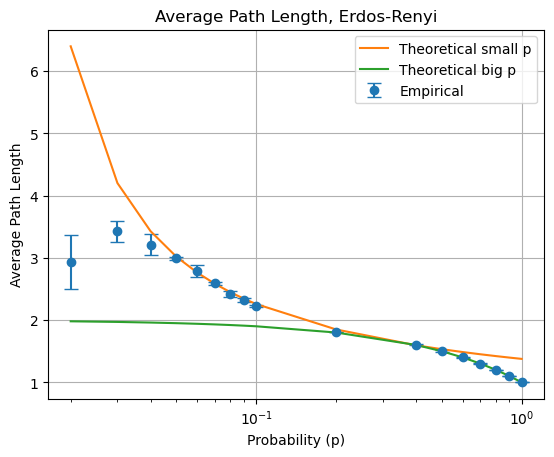

In [61]:
import matplotlib.pyplot as plt

run_avg = np.array(run_avg)
mean_vals = np.mean(run_avg, axis=0)
std_vals = np.std(run_avg, axis=0)

plt.errorbar(p_list, mean_vals, yerr=std_vals, fmt='.', markersize=12, capsize=5, label='Empirical')
plt.plot(p_list, L_av_theoretical_small, label='Theoretical small p')
plt.plot(p_list, L_av_theoretical_big, label='Theoretical big p')
plt.xscale('log')  # Logarithmic scale for x-axis
plt.xlabel('Probability (p)')
plt.ylabel('Average Path Length')
plt.legend()
plt.title('Average Path Length, Erdos-Renyi')
plt.grid(True)
plt.show()

## P2 

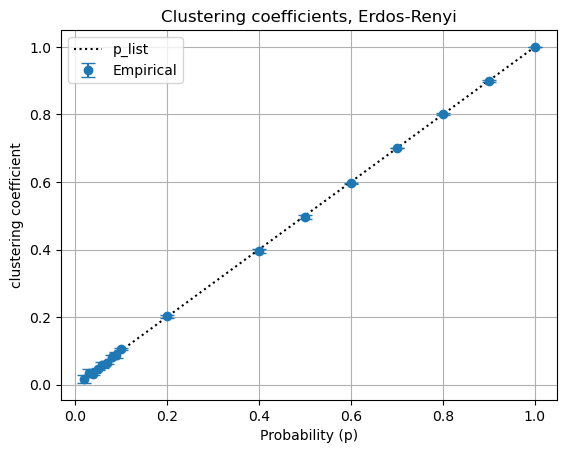

In [62]:
c_avg = np.array(c_avg)
mean_c = np.mean(c_avg,axis=0)
std_c = np.std(c_avg,axis=0)

plt.errorbar(p_list, mean_c, yerr=std_c, fmt='.', markersize=12, capsize=5, label='Empirical')
plt.plot(p_list, p_list, 'k:', label='p_list')  # 'k:' for black dotted line
plt.xlabel('Probability (p)')
plt.ylabel('clustering coefficient')
plt.legend()
plt.title('Clustering coefficients, Erdos-Renyi')
plt.grid(True)
plt.show()

# Task 2

## P3

In [63]:
n = 200
p_list = np.array([0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1])
runs = 3
run_avg = []
c_avg = []
for run in range(runs):

    L_av = np.zeros(np.size(p_list))
    c_list = np.zeros(len(p_list))

    for i in range(np.size(p_list)):
        p = p_list[i]
        print(f'iteration {i}: p={p}')
        A_ER, x_ER, y_ER = erdos_renyi_rg(n, p)
        L = matrix_path_length(A_ER)
        for j in range(n):
            L_av[i] += np.sum(L[j, j + 1:n])
        L_av[i] /= (n * (n - 1) / 2)
        c_list[i] = clustering_coefficient(A_ER)
    
    run_avg.append(L_av)
    c_avg.append(c_list)

iteration 0: p=0.02
iteration 1: p=0.03
iteration 2: p=0.04
iteration 3: p=0.05
iteration 4: p=0.06
iteration 5: p=0.07
iteration 6: p=0.08
iteration 7: p=0.09
iteration 8: p=0.1
iteration 9: p=0.2
iteration 10: p=0.4
iteration 11: p=0.5
iteration 12: p=0.6
iteration 13: p=0.7
iteration 14: p=0.8
iteration 15: p=0.9
iteration 16: p=1.0
iteration 0: p=0.02
iteration 1: p=0.03
iteration 2: p=0.04
iteration 3: p=0.05
iteration 4: p=0.06
iteration 5: p=0.07
iteration 6: p=0.08
iteration 7: p=0.09
iteration 8: p=0.1
iteration 9: p=0.2
iteration 10: p=0.4
iteration 11: p=0.5
iteration 12: p=0.6
iteration 13: p=0.7
iteration 14: p=0.8
iteration 15: p=0.9
iteration 16: p=1.0
iteration 0: p=0.02
iteration 1: p=0.03
iteration 2: p=0.04
iteration 3: p=0.05
iteration 4: p=0.06
iteration 5: p=0.07
iteration 6: p=0.08
iteration 7: p=0.09
iteration 8: p=0.1
iteration 9: p=0.2
iteration 10: p=0.4
iteration 11: p=0.5
iteration 12: p=0.6
iteration 13: p=0.7
iteration 14: p=0.8
iteration 15: p=0.9
iterat

In [64]:
L_av_theoretical_small = np.zeros(len(p_list))
gamma = 0.57722
for idx,p in enumerate(p_list):
    numerator = np.log(n) - gamma
    denominator = np.log(p*(n-1))
    L_av_theoretical_small[idx] = numerator/denominator + 0.5

L_av_theoretical_big = np.zeros(len(p_list))
for idx,p in enumerate(p_list):
    L_av_theoretical_big[idx] = 2-p

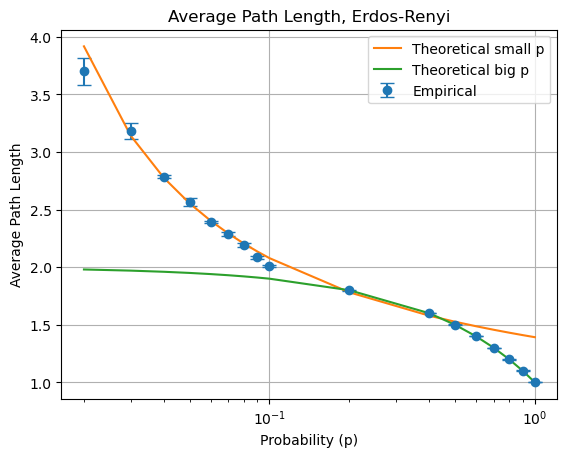

In [65]:
import matplotlib.pyplot as plt

run_avg = np.array(run_avg)
mean_vals = np.mean(run_avg, axis=0)
std_vals = np.std(run_avg, axis=0)

plt.errorbar(p_list, mean_vals, yerr=std_vals, fmt='.', markersize=12, capsize=5, label='Empirical')
plt.plot(p_list, L_av_theoretical_small, label='Theoretical small p')
plt.plot(p_list, L_av_theoretical_big, label='Theoretical big p')
plt.xscale('log')  # Logarithmic scale for x-axis
plt.xlabel('Probability (p)')
plt.ylabel('Average Path Length')
plt.legend()
plt.title('Average Path Length, Erdos-Renyi')
plt.grid(True)
plt.show()

## P4


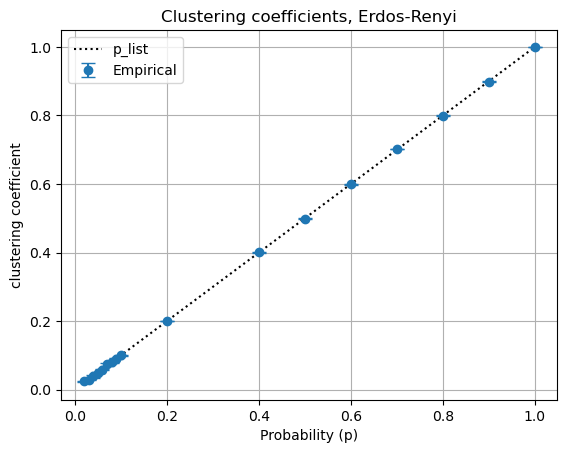

In [66]:
c_avg = np.array(c_avg)
mean_c = np.mean(c_avg,axis=0)
std_c = np.std(c_avg,axis=0)

plt.errorbar(p_list, mean_c, yerr=std_c, fmt='.', markersize=12, capsize=5, label='Empirical')
plt.plot(p_list, p_list, 'k:', label='p_list')  # 'k:' for black dotted line
plt.xlabel('Probability (p)')
plt.ylabel('clustering coefficient')
plt.legend()
plt.title('Clustering coefficients, Erdos-Renyi')
plt.grid(True)
plt.show()

## Q1

If we have 3 nodes connected to each other and the probability of creating an edge is p, then the probability of creating an edge between the first and the last node of these connected ones (creating a triangle) is also equal to p. If one generalizes this to a bigger network, the same idea should follow. 

In summary: The probability of any two nodes being connected is independent of other connections. So, whether two nodes are already connected to other nodes doesn't affect the probability of them being connected to each other.